In [1]:
import pandas as pd

df = pd.read_csv("rawdata.csv")

zipcode_means = df.groupby('ZipCode').agg({'NO2': 'mean', 'PM2.5': 'mean', 'PM10': 'mean', 
                                           'O3': 'mean', 'SO2': 'mean', 'aqi': 'mean'})

def max_category(series):
    if not series.empty:
        return series.value_counts().idxmax()
    else:
        return None

aqi_columns = ['SO2', 'PM2.5', 'NO2', 'PM10', 'O3', 'aqi']
for aqi_column in aqi_columns:
    df[aqi_column] = df[aqi_column].apply(lambda x: x if not pd.isna(x) else None)

non_empty_data = df.dropna(subset=['category'])
zipcode_means['category'] = non_empty_data.groupby('ZipCode')['category'].apply(max_category)

zipcode_means[['latitude', 'longitude']] = df.groupby('ZipCode')[['latitude', 'longitude']].first()

zipcode_means.head()
zipcode_means.to_csv('avg_aqi_google.csv')


In [2]:
df.category.unique()

array(['Good air quality', 'Moderate air quality'], dtype=object)

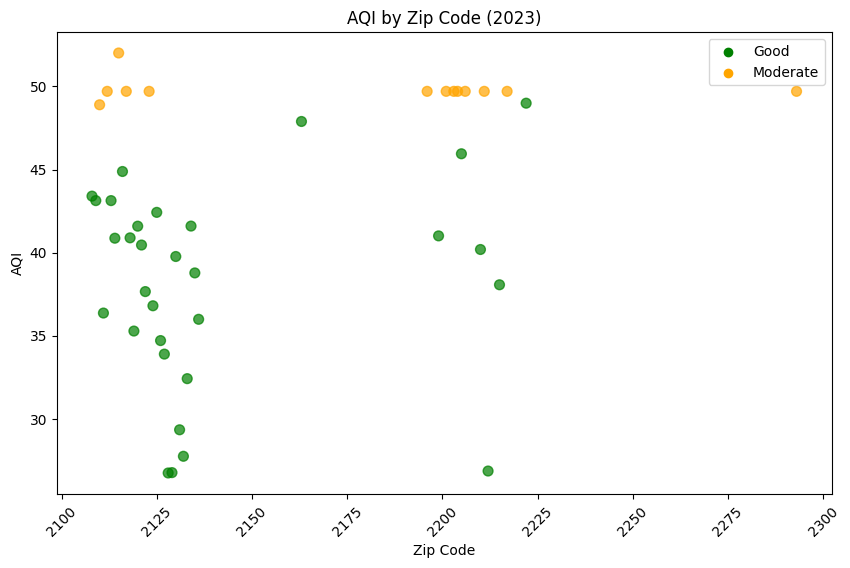

Zip Codes with Moderate AQI


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('avg_aqi_google.csv')

def map_category_to_color(category):
    if category == 'Good air quality':
        return 'green'
    elif category == 'Moderate air quality':
        return 'orange'
    else:
        return 'blue'  
    
data['CategoryColor'] = data['category'].apply(map_category_to_color)

#zip_code_range = (2100, 2225) 
#filtered_data = data[(data['ZipCode'] >= zip_code_range[0]) & (data['ZipCode'] <= zip_code_range[1])]
filtered_data = data.copy()

plt.figure(figsize=(10, 6))


plt.scatter(filtered_data['ZipCode'], filtered_data['aqi'], c=filtered_data['CategoryColor'], s=50, alpha=0.7)
plt.title('AQI by Zip Code (2023)')
plt.xlabel('Zip Code')
plt.ylabel('AQI')
plt.xticks(rotation=45)

legend_labels = {
    'Good': 'green',
    'Moderate': 'orange',
}
for category, color in legend_labels.items():
    plt.scatter([], [], label=category, color=color)

plt.legend()

#plt.xlim(zip_code_range)

plt.show()

red_aqi_zip_codes = filtered_data[filtered_data['aqi'] == 'Moderate air quality']['ZipCode']

print("Zip Codes with Moderate AQI")
for zip_code in red_aqi_zip_codes.unique():
    print(zip_code)


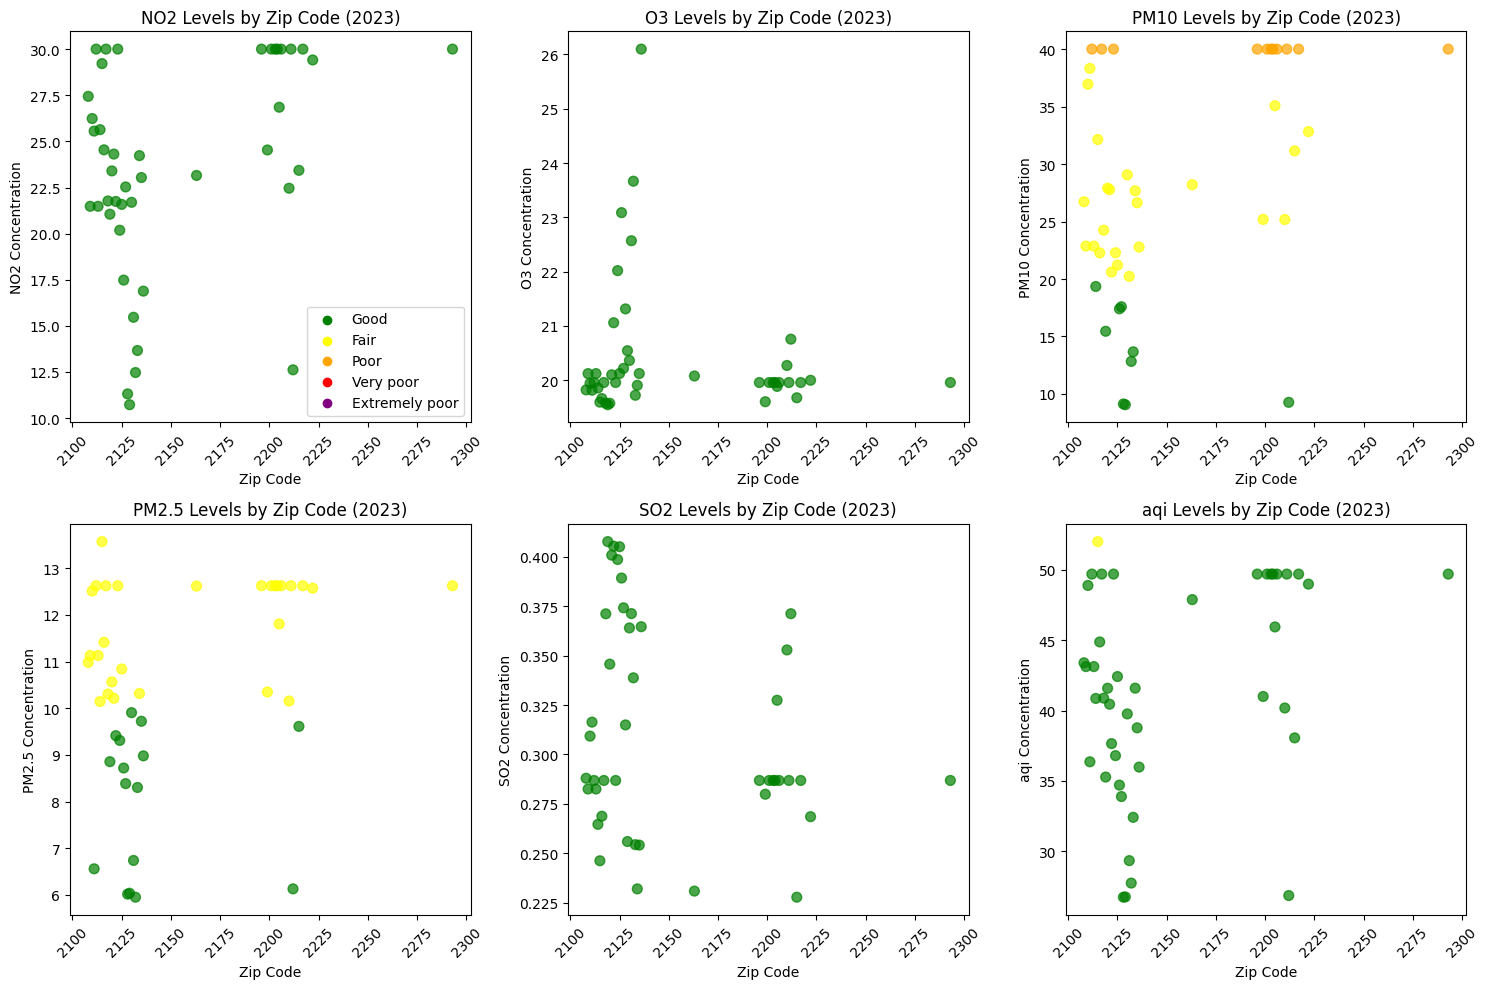

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('avg_aqi_google.csv')

def map_to_category(value, category_limits):
    for category, limits in category_limits.items():
        if limits[0] is None:
            if value <= limits[1]:
                return category
        elif limits[1] is None:
            if value >= limits[0]:
                return category
        elif limits[0] <= value <= limits[1]:
            return category
    return None

category_limits = {
    'NO2': {'Good': (None, 50), 'Fair': (50, 100), 'Poor': (100, 150), 'Very poor': (150, 200), 'Extremely poor': (200, None)},
    'O3': {'Good': (None, 50), 'Fair': (50, 70), 'Poor': (70, 90), 'Very poor': (90, 120), 'Extremely poor': (120, None)},
    'PM10': {'Good': (None, 20), 'Fair': (20, 40), 'Poor': (40, 60), 'Very poor': (60, 100), 'Extremely poor': (100, None)},
    'PM2.5': {'Good': (None, 10), 'Fair': (10, 20), 'Poor': (20, 30), 'Very poor': (30, 50), 'Extremely poor': (50, None)},
    'SO2': {'Good': (None, 5), 'Fair': (5, 10), 'Poor': (10, 20), 'Very poor': (20, 40), 'Extremely poor': (40, None)},
    'aqi': {'Good': (None, 50), 'Fair': (50, 100), 'Poor': (100, 150), 'Very poor': (150, 200), 'Extremely poor': (200, None)}
}

pollutants = ['NO2', 'O3', 'PM10', 'PM2.5', 'SO2', 'aqi']

plt.figure(figsize=(15, 10))

for idx, pollutant in enumerate(pollutants, start=1):
    plt.subplot(2, 3, idx)
    
    data[f'{pollutant}_Category'] = data[pollutant].apply(lambda x: map_to_category(x, category_limits[pollutant]))

    category_colors = {
        'Good': 'green',
        'Fair': 'yellow',
        'Poor': 'orange',
        'Very poor': 'red',
        'Extremely poor': 'purple'
    }
    
    data[f'{pollutant}_CategoryColor'] = data[f'{pollutant}_Category'].map(category_colors)

    plt.scatter(data['ZipCode'], data[pollutant], c=data[f'{pollutant}_CategoryColor'], s=50, alpha=0.7)
    plt.title(f'{pollutant} Levels by Zip Code (2023)')
    plt.xlabel('Zip Code')
    plt.ylabel(f'{pollutant} Concentration')
    plt.xticks(rotation=45)

    if idx == 1:
        for category, color in category_colors.items():
            plt.scatter([], [], label=category, color=color)
        plt.legend()

plt.tight_layout()
plt.show()

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('filtered_air_quality_data.csv')

def map_category_to_color(category):
    if category == 'Good':
        return 'green'
    elif category == 'Moderate':
        return 'orange'
    elif category == 'Unhealthy for Sensitive Groups':
        return 'red'
    else:
        return 'blue' 

data['CategoryColor'] = data['CategoryName_PM2.5'].apply(map_category_to_color)

zip_code_range = (2100, 2225)

filtered_data = data[(data['ZipCode'] >= zip_code_range[0]) & (data['ZipCode'] <= zip_code_range[1])]
plt.figure(figsize=(10, 6))


plt.scatter(filtered_data['ZipCode'], filtered_data['AQI_PM2.5'], c=filtered_data['CategoryColor'], s=50, alpha=0.7)
plt.title('AQI PM2.5 by Zip Code')
plt.xlabel('Zip Code')
plt.ylabel('AQI PM2.5')
plt.xticks(rotation=45)

legend_labels = {
    'Good': 'green',
    'Moderate': 'orange',
    'Unhealthy for Sensitive Groups': 'red',
}
for category, color in legend_labels.items():
    plt.scatter([], [], label=category, color=color)

plt.legend()

plt.xlim(zip_code_range)


plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'filtered_air_quality_data.csv'